In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [3]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

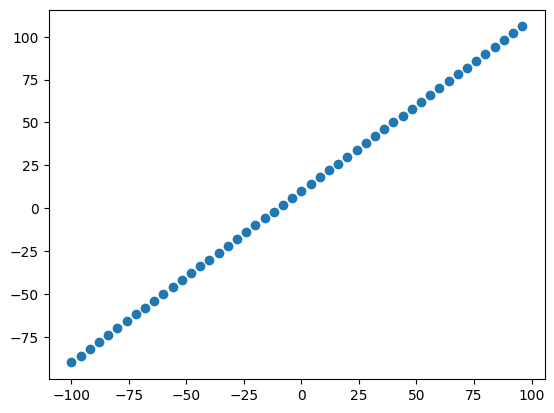

In [4]:
plt.scatter(X,y)
plt.show()

In [5]:
len(X)

50

In [6]:
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

X_train, X_test, y_train, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

In [7]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

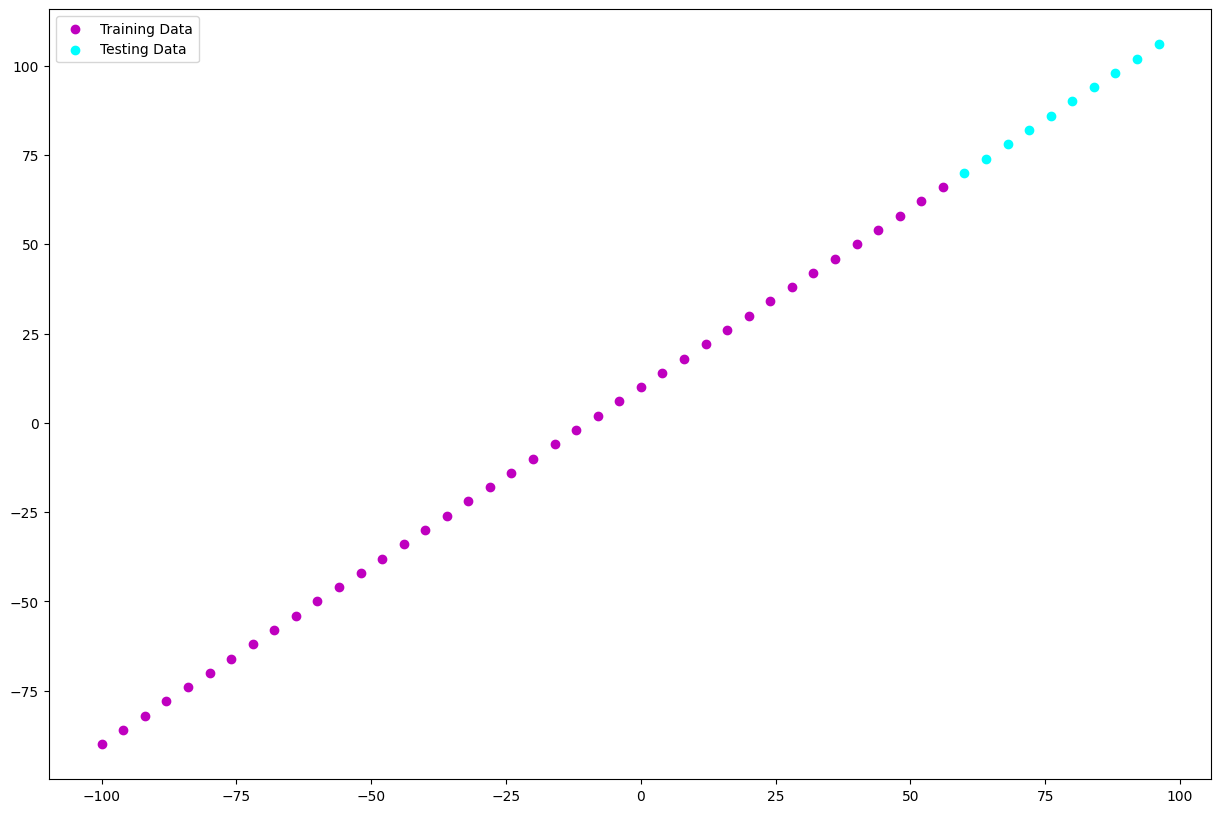

In [8]:
# Visualization

plt.figure(figsize=(15,10))

# plot the training data in magenta
plt.scatter(X_train, y_train, c="m", label="Training Data")

# plot the test data in cyan
plt.scatter(X_test, y_test, c="cyan", label="Testing Data")

# Show a legend
plt.legend()

plt.show()

In [10]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model

In [15]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [17]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

In [18]:
X, y

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
          80.,   84.,   88.,   92.,   96.], dtype=float32)>,
 <tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
        -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
         -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
         42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
         86.,  90.,  94.,  98., 102., 106.], dtype=float32)>)

In [21]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


    * Total params - Total number of parameters in the model.
    * Trainable params - These are the parameters (patterns) the model can update as it trains.
    * Non - Trainable params - These parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**.) 

In [25]:
# Neural networks are a class of machine learning algorithms inspired by the structure and functioning of the 
# human brain. They consist of interconnected nodes, called neurons, organized into layers. Each neuron 
# in a layer receives input data, processes it, and produces an output. The connections between neurons 
# have associated weights and biases, which are crucial parameters that enable the network to learn from 
# data during the training process.


# Weights:
# Weights are the learnable parameters in a neural network that determine the strength of the connections between 
# neurons. Each connection between neurons in adjacent layers is associated with a weight. During training, 
# the neural network adjusts these weights to minimize the difference between predicted and actual outputs. 
# The weights essentially represent the importance of specific input features in influencing the network's 
# decision-making process. Larger weights imply that a particular input has a more significant impact on the output.


# Biases:
# Biases are another set of learnable parameters in a neural network. Each neuron in a layer (except the input layer)
# has an associated bias term. The bias term allows the neural network to introduce an offset, helping it to 
# learn complex patterns and generalize better to unseen data. Bias ensures that even when all inputs are 
# zero or inactive, the neuron can still be activated, introducing flexibility into the model's predictions.


# Mathematically, let's consider a single neuron with inputs x1, x2, ..., xn and associated weights w1, w2, ..., wn, 
# and a bias term b. The output y of the neuron can be computed as follows:

# y = activation_function(w1 * x1 + w2 * x2 + ... + wn * xn + b)

# Here, the activation_function represents the non-linear transformation applied to the sum of the weighted inputs 
# and the bias to introduce non-linearity in the model.

# In a neural network with multiple layers, the outputs of neurons in one layer become inputs to neurons in the 
# next layer. The process of computing the outputs through each layer is known as forward propagation. 
# During training, the network adjusts the weights and biases through an optimization process called backpropagation 
# to minimize a specified loss function, thus making the model more accurate in predicting the desired outputs.


# It's important to note that the success of a neural network heavily relies on finding appropriate weights and 
# biases through the training process, which requires a suitable dataset and optimization algorithms.

In [26]:
# Lets try to change layers

# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1])
])

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# Let's fit our model to the training data
# model.fit(X_train, y_train, epochs=100, verbose=0) #verbose = 0 par model 100 epochs run ni karega
model.fit(X_train, y_train, epochs=100, verbose=1) # isme 100 epoch run ho jaayega since verbose=1

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 8.2032 - mae: 8.2032
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 7.2818 - mae: 7.2818
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 8.0754 - mae: 8.0754
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 7.4349 - mae: 7.4349
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 8.2580 - mae: 8.2580
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 7.2982 - mae: 7.2982
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 7.9038 - mae: 7.9038
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 7.3628 - mae: 7.3628
Epoch 9/100
2/2 [==============================] - 0s 999us/step - loss: 8.4271 - mae: 8.4271
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 8.2536 - mae: 8.2536
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 7.510